# T2-mapping interactive figures

In [1]:
import os
import numpy as np

In [2]:
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.connect_matlab()

TE_1 = eng.workspace['TE_1']


plt.imshow(x)

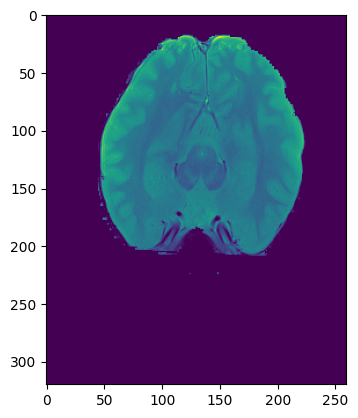

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x)

### 1. Transverse relaxation decay curves for different T2 and T2* values

##### 1.1 Data

In [2]:
# Define the signals 

T2_WM = 109.77
T2_GM = 96.07

T2star_WM = 67.63
T2star_GM = 48.48

TE = np.linspace(0, 300, 100)

T2_signal_WM = np.exp(-TE / T2_WM)
T2_signal_GM = np.exp(-TE / T2_GM)

T2star_signal_WM = np.exp(-TE / T2star_WM)
T2star_signal_GM = np.exp(-TE / T2star_GM)

##### 1.2 Plot

In [3]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from IPython.core.display import display, HTML

config={'showLink': False, 'displayModeBar': False}

# T2 signals

wm_T2 = go.Scatter(
    x = TE,
    y = T2_signal_WM,
    name = 'T<sub>2</sub> = 109.77 ms (White Matter)',
    text = 'T<sub>2</sub> = 109.77 ms (White Matter)',
    hoverinfo = 'x+y+text',
    line=dict(color='#1f77b4', dash='solid'),
    visible = True
)

gm_T2 = go.Scatter(
    x = TE,
    y = T2_signal_GM,
    name = 'T<sub>2</sub> = 96.07 ms (Gray Matter)',
    text = 'T<sub>2</sub> = 96.07 ms (Gray Matter)',
    hoverinfo = 'x+y+text',
    line=dict(color='#ff7f0e', dash='solid'),
    visible = True
)

# T2* signals

wm_T2star = go.Scatter(
    x = TE,
    y = T2star_signal_WM,
    name = 'T<sub>2</sub>* = 67.63 ms (White Matter)',
    text = 'T<sub>2</sub>* = 67.63 ms (White Matter)',
    hoverinfo = 'x+y+text',
    line=dict(color='#1f77b4', dash='dot'),
    visible = False
)

gm_T2star = go.Scatter(
    x = TE,
    y = T2star_signal_GM,
    name = 'T<sub>2</sub>* = 48.48 ms (Gray Matter)',
    text = 'T<sub>2</sub>* = 48.48 ms (Gray Matter)',
    hoverinfo = 'x+y+text',
    line=dict(color='#ff7f0e', dash='dot'),
    visible = False
)

data = [wm_T2, gm_T2, wm_T2star, gm_T2star]

layout = go.Layout(
    width=600,
    height=375,
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=60,
        t=20,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.175,
            showarrow=False,
            text='Echo Time – TE (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.50,
            showarrow=False,
            text='Transverse Magnetization (M<sub>xy</sub>)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.53,
        y=0.97,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ),
    updatemenus=[
        dict(
            buttons=list([
                # Display T2
                dict(
                    args=[{'visible': [True, True, False, False]}],
                    label='T2',
                    method='update'
                ),
                # Display T2*
                dict(
                    args=[{'visible': [False, False, True, True]}],
                    label='T2*',
                    method='update'
                ),
                # Display both T2 and T2*
                dict(
                    args=[{'visible': [True, True, True, True]}],
                    label='T2 and T2*',
                    method='update'
                ),
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.30,
            xanchor='left',
            y=1.0,
            yanchor='top',
            font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
            )
        ),
    ]
) 

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'ir_fig_2.html', config = config)

C:\Users\Samuelle\AppData\Local\Temp\ipykernel_19648\1012886209.py:10: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



### 2. Data fitting with different noise levels

In [4]:
import nibabel as nb
import matplotlib.pyplot as plt

# Load images (from qMRLab example data)

T2w = nb.load("C:/Users/Samuelle/Desktop/mwf_demo/MET2data.nii.gz")
T2w = T2w.get_fdata()
T2w = np.rot90(T2w)

# T2w image for TE = 25.6 ms
T2w_2 = T2w[:,:,:,2]

# T2w image for TE = 64 ms
T2w_5 = T2w[:,:,:,5]

# T2w image for TE = 128 ms
T2w_10 = T2w[:,:,:,10]

# T2w image for TE = 192 ms
T2w_15 = T2w[:,:,:,15]

# T2w image for TE = 256 ms
T2w_20 = T2w[:,:,:,20]

# T2w image for TE = 320 ms
T2w_25 = T2w[:,:,:,25]

# T2w image for TE = 384 ms
T2w_30 = T2w[:,:,:,30]

# T2 map (following qMRLab fitting demo)
T2_map = nb.load("C:/Users/Samuelle/Desktop/mwf_demo/FitResults/MWF.nii.gz")
T2_map = T2_map.get_fdata()
T2_map = np.rot90(T2_map)

# Axes 
xAxis = np.arange(T2_map.shape[1])
yAxis = np.arange(T2_map.shape[0])

### 3. T2w images at different TE, compared to T2 map

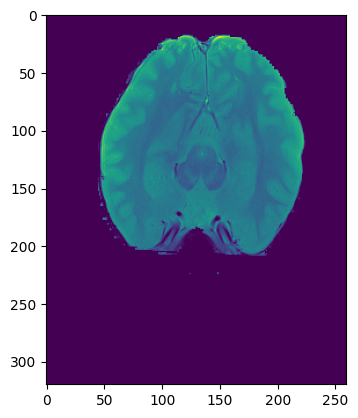

In [3]:
plt.imshow(TE_1)

In [1]:
import matlab.engine
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
# from chart_studio.plotly import __version__
from chart_studio.plotly import plot
from IPython.display import display, HTML
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

config={'showLink': False, 'displayModeBar': False}

eng = matlab.engine.connect_matlab()

# Get MATLAB data
T2_map = np.array(eng.workspace['T2_map'])
TE_1 = np.array(eng.workspace['TE_1'])
TE_2 = np.array(eng.workspace['TE_2'])
TE_3 = np.array(eng.workspace['TE_3'])
TE_4 = np.array(eng.workspace['TE_4'])

xAxis = np.arange(0, T2_map.shape[1])
yAxis = np.arange(0, T2_map.shape[0])

trace1 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TE_1,
                   colorscale='Gray',
                   showscale = False,
                   visible=False,
                   name = 'Signal')
trace2 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TE_2,
                   colorscale='Gray',
                   showscale = False,
                   visible=False,
                   name = 'Signal')
trace3 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TE_3,
                   colorscale='Gray',
                   showscale = False,
                   visible=True,
                   name = 'Signal')
trace4 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TE_4,
                   colorscale='Gray',
                   visible=False,
                   showscale = False,
                   name = 'Signal')
trace5 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=T2_map,
                   colorscale='Portland',
                   xaxis='x2',
                   yaxis='y2',
                   visible=True,
                   name = 'T1 values (ms)',
                   zmin=0, 
                   zmax=1000,)


data=[trace1, trace2, trace3, trace4, trace5]

updatemenus = list([
    dict(active=2,
         x = 0.12,
         xanchor = 'left',
         y = -0.15,
         yanchor = 'bottom',
         direction = 'up',
         font=dict(
                family='Times New Roman',
                size=16
            ),
         buttons=list([   
            dict(label = '12.8 ms',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, True]},
                         ]),
            dict(label = '128 ms ms',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, True]},
                         ]),
            dict(label = '256 ms',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, True]},
                         ]),
            dict(label = '384 ms',
                 method = 'update',
                 args = [{'visible': [False,False, False, True, True]},
                         ])
        ]),
    )
])

layout = dict(
    width=560,
    height=345,
    margin = dict(
                t=40,
                r=50,
                b=10,
                l=50),
    annotations=[
        dict(
            x=0.06,
            y=1.15,
            showarrow=False,
            text='T2w images',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.6,
            y=1.15,
            showarrow=False,
            text='T<sub>2</sub> map',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=1.22,
            y=1.15,
            showarrow=False,
            text='T<sub>2</sub> (ms)',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.02,
            y=-0.15,
            showarrow=False,
            text='TE:',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis = dict(range=[0, yAxis[-1]], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 0.5]),
    yaxis = dict(range=[0, yAxis[-1]], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1]),
    xaxis2 = dict(range=[0, yAxis[-1]], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0.5, 1]),
    yaxis2 = dict(range=[0, yAxis[-1]], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1], anchor='x2'),
    showlegend = False,
    autosize = False,
    updatemenus=updatemenus
)

fig = dict(data=data, layout=layout)


iplot(fig, filename = 'ir_fig_2.html', config = config)

In [2]:
pip install chart-studio


### 4. Mono-exponential T2 fitting compared to multi-exponential fitting

##### 4.1 Data

In [6]:
# Parameters
TE = np.linspace(0, 5, 100)

# T2 constants
T2_CSF = 2.0
T2_GM = 1.0

# Decay exponential curves
signal_CSF = np.exp(-TE / T2_CSF)
signal_GM = np.exp(-TE / T2_GM)

percentage_CSF = 0.25 # initialize percentage of CSF
percentage_GM = 1 - percentage_CSF # initialize percentage of GM
multiexpo_signal = percentage_CSF*signal_CSF + percentage_GM*signal_GM

##### 4.2 Plot

In [7]:
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from IPython.core.display import display, HTML

config={'showLink': False, 'displayModeBar': False}

# CSF signal

csf_T2 = go.Scatter(
    x = TE,
    y = signal_CSF,
    name = 'CSF',
    text = 'CSF',
    hoverinfo = 'x+y+text',
    line=dict(color='#2ca02c'),
    visible = True
)

# Gray matter signal

gm_T2 = go.Scatter(
    x = TE,
    y = signal_GM,
    name = 'Gray Matter',
    text = 'Gray Matter',
    hoverinfo = 'x+y+text',
    line=dict(color='#ff7f0e'),
    visible = True
)

# Multi-exponential signal (combination of GM and CSF in a single voxel)

multiexpo_T2 = go.Scatter(
    x = TE,
    y = multiexpo_signal,
    name = f'{percentage_CSF} * CSF + {1- percentage_CSF} * Gray matter',
    text = f'{percentage_CSF} * CSF + {1- percentage_CSF} * Gray matter',
    hoverinfo = 'x+y+text', 
    line=dict(color='#9467bd'),
)

data = [csf_T2, gm_T2, multiexpo_T2]

# Define steps for slider
steps = []
for percentage_CSF in np.arange(0, 1.05, 0.05):  # For slider with 5% increments
    multiexpo_signal = percentage_CSF * signal_CSF + (1 - percentage_CSF) * signal_GM
    percentage_GM = 1 - percentage_CSF
    steps.append(
        dict(
            method='update',
            args=[
                {'y': [signal_CSF, signal_GM, multiexpo_signal]},
                {'visible': [True, True, True]}, 
                {'name': f'{int(percentage_CSF*100)}% CSF   {int(percentage_GM*100)}% GM   50% Mix'},
            ],
            label=f'<b>{int(percentage_CSF*100)}% CSF {int(percentage_GM*100)}% GM</b>',
        )
    )

layout = go.Layout(
    width=670,
    height=475,
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=30,
        t=30,
    ),
    sliders = [
        dict(
            steps=steps,
            active = 0,
            len = 1.0,
            pad = {'t':50},
        )
    ],
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.175,
            showarrow=False,
            text='Echo Time – TE (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.50,
            showarrow=False,
            text='Transverse Magnetization (M<sub>xy</sub>)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2,
    ),
    yaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.53,
        y=0.97,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    )
) 

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'ir_fig_2.html', config = config)

C:\Users\Samuelle\AppData\Local\Temp\ipykernel_28776\2903252913.py:10: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display

